# Files and imports

In [3]:
from pandas import read_csv, DataFrame
import pandas as pd
import numpy as np


#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'dataset/df_msg_pre_proc.csv'

file_tag = 'df_msg_pre_proc'

data = pd.read_csv(filepath)

/var/folders/cb/3dkrbpbn63zcqbvg5csx6rhc0000gp/T/ipykernel_8057/1199511.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath)


In [4]:
%run "dslabs_functions.py"

dslabs_functions loaded


# Variable Encoding

## Ordinal Encoding


### Binary

In [5]:
from pandas import read_csv, DataFrame
from dslabs_functions import get_variable_types, encode_cyclic_variables, dummify

data: DataFrame = read_csv(filepath)
vars: dict[str, list] = get_variable_types(data)

true_false: dict[str, int] = {"false": 0, "False": 0, "f": 0, False: 0, "true": 1, "True": 1, "t": 1, True: 1}
channel_msg_values: dict[str, int] = {"mobile_push": 0, "email": 1}
time_of_day_values: dict[str, int] = {"Morning": 0, "Afternoon": 1}

encoding: dict[str, dict[str, int]] = {
    "is_opened": true_false,
    "is_clicked": true_false,
    "is_unsubscribed": true_false,
    "is_hard_bounced": true_false,
    "is_soft_bounced": true_false,
    "is_complained": true_false,
    #"is_blocked": true_false,  # Added
    "is_purchased": true_false,
    "subject_with_personalization": true_false,
    "subject_with_deadline": true_false,
    "subject_with_emoji": true_false,
    "subject_with_bonuses": true_false,
    "subject_with_discount": true_false,
    "subject_with_saleout": true_false,
    "is_weekend": true_false,  # Added
    "time_of_day": time_of_day_values,  # Added
    "channel_msg": channel_msg_values  # Added
}
data_enc: DataFrame = data.replace(encoding, inplace=False)
data_enc.head()

dslabs_functions loaded


,channel_msg,platform,email_provider,sent_at,is_opened,is_clicked,is_unsubscribed,is_hard_bounced,is_soft_bounced,is_complained,...,hour,min,time_of_day,days_diff_opened_first_time_at_sent_at,days_diff_clicked_first_time_at_sent_at,days_diff_unsubscribed_at_sent_at,days_diff_complained_at_sent_at,days_diff_purchased_at_sent_at,days_diff_first_purchase_date_sent_at,days_diff_started_at_sent_at
0,1,NaN,mail.ru,2021-04-30 05:00:07,1,0,0,0,0,0,...,5,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,mail.ru,2021-04-30 05:00:29,0,0,0,0,0,0,...,5,0,0,NaN,NaN,NaN,NaN,NaN,337.0,NaN
2,1,NaN,mail.ru,2021-04-30 05:01:34,0,0,0,0,0,0,...,5,1,0,NaN,NaN,NaN,NaN,NaN,275.0,NaN
3,1,NaN,yandex.ru,2021-04-30 05:01:46,0,0,0,0,0,0,...,5,1,0,NaN,NaN,NaN,NaN,NaN,661.0,NaN
4,1,NaN,yandex.ru,2021-04-30 05:02:22,1,0,0,0,0,0,...,5,2,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### Symbolic

In [6]:
for v in vars["symbolic"]:
    print(v, data[v].unique())

channel_msg ['email' 'mobile_push' 'web_push']
platform [nan 'smartphone' 'desktop' 'phablet' 'tablet']
email_provider ['mail.ru' 'yandex.ru' 'gmail.com' 'rambler.ru' 'inbox.ru' 'icloud.com'
 'mail.com' 'yandex.ua' 'bk.ru' 'list.ru' 'private' 'ya.ru' 'yahoo.fr'
 'lenta.ru' nan 'internet.ru' 'hotmail.com' 'narod.ru' '74.ru' 'live.com'
 'yahoo.com' 'live.ru' 'e1.ru' 'gmai.com' 'russianpost.ru' 'me.com'
 'outlook.com' 'sibmail.com' 'com.ru' 'ngs.ru' 'ro.ru' 'mail2000.ru'
 '72.ru' 'nxt.ru' 'yopmail.com' 'yangex.ru' 'protonmail.com' 'tut.by'
 '63.ru' 'mail.ua' 'yandeks.ru' 'aaanet.ru' '211.ru' 'sampo.ru' 'aol.com'
 'gmail.com.com' 'yandex.com' 'my.com' 'omgau.org' 'autorambler.ru'
 'aport.ru' 'hotbox.ru' 'email.ru' 'dc2b.ru' 'iclud.com' 'udm.ru'
 'icloub.com' 'myrambler.ru' 'mmk.ru' 'mtsretail.ru' 'gmaol.com' 'cdek.ru'
 '59.ru' 'pochtabank.ru' 'inbox.lv' 'li.ru' 'ukr.net' 'iclaud.com'
 'googlemail.com' 'pepsico.com' 'sochi.com' 'front.ru' 'yandex.kz'
 'pnu.edu.ru' 'edu.tatar.ru' 'cn.ru' 'tp

- campaign_type ['bulk' 'transactional' 'trigger']
    - transactional e trigger, pela sua definiçao, estao mais relacionados uns com os outros. o trigger e o bulk tem de estar mais afastados, ou entao transactional e bulk tem de estar afastados. 

- platform [nan 'phablet' 'smartphone' 'desktop' 'tablet']
    - according to their size and similarities/functionalities

- email_provider [nan 'ya.ru' 'mail.ru' 'yandex.ru' 'inbox.ru' 'gmail.com' 'internet.ru'
 'list.ru' 'rambler.ru' 'bk.ru' 'icloud.com' 'ro.ru' 'spartak.ru'
 'private' 'lenta.ru' 'udm.ru' 'mail2000.ru' 'me.com' 'yahoo.com'
 'googlemail.com' 'nm.ru' 'e1.ru' 'mail.ua' 'olympus.ru' 'paso.ru'
 'ukr.net' 'yandex.ua' 'tut.by' 'my.com' 'online.ua' 'myrambler.ru'
 'yandex.by' 'autorambler.ru' 'meta.ua' 'spark-mail.ru' '74.ru'
 'vtomske.ru' 'auchan.ru' 'land.ru' 'inbox.lv' 'samaradom.ru' 'ngs.ru'
 'yandex.com' 'narod.ru' 'rarus.ru' 'nextmail.ru']
    - Based on the perceived importance, similarity, and usage in Russia. This ranking considers the popularity and common usage of these email providers in Russia, and also taking into account 
- channel_cmp ['mobile_push' 'email' 'multichannel']
    - In the context of a Russian e-commerce multichannel platform, we need to consider the effectiveness and common usage of each channel for sending campaigns and messages to clients. Here's a suggested ranking based on typical engagement and reach:

    - Multichannel: This involves using multiple channels to reach clients, which can increase engagement and effectiveness by combining the strengths of various channels.

    - Email: Email is a widely used and effective channel for detailed communication and marketing campaigns. It is commonly used in Russia for e-commerce communications.

    - Mobile Push: Mobile push notifications are effective for immediate and short notifications but may have lower engagement compared to email and multichannel approaches. However, they are still quite popular for quick updates and alerts.
- topic ['sale out' 'order created' 'profile updated' 'abandoned category'
 'added to wish list' 'order ready for pickup' 'subscribed'
 'abandoned cart' 'recent purchase' 'abandoned view' nan 'bonuses expired'
 'order cancelled' 'abandoned search' 'event']
    - based on their similarities and potential importance, and also on common e-commerce and user interaction scenarios
    - Order-related topics: These are directly related to transactions and are typically of high importance.
        - order created
        - order ready for pickup
        - order cancelled
        - recent purchase
    - Abandoned actions: These indicate potential lost sales or user interest.
        - abandoned cart
        - abandoned category
        - abandoned view
        - abandoned search
    - User engagement: These involve user interactions and updates.
        - profile updated
        - added to wish list
        - subscribed
    - Promotional and informational: These are related to promotions and notifications.
        - sale out
        - bonuses expired
        - event
- month ['April' 'May' 'June']
    - 0, 1, 2

In [7]:
campaign_type_values: dict[str, int] = {
    "bulk": 0, 
    "transactional": 1, 
    "trigger": 2
}
platform_values: dict[str, int] = {
    "smartphone": 0,
    "phablet": 1,
    "tablet": 2,
    "desktop": 3,
}
month_values: dict[str, int] = {
    "April": 0,
    "May": 1,
    "June": 2,
}
channel_values: dict[str, int] = {
    'multichannel': 0,
    'email': 1,
    'mobile_push': 2
}
topic_values: dict[str, int] = {
    'order created': 0,
    'order ready for pickup': 1,
    'order cancelled': 2,
    'recent purchase': 3,
    'abandoned cart': 4,
    'abandoned category': 5,
    'abandoned view': 6,
    'abandoned search': 7,
    'profile updated': 8,
    'added to wish list': 9,
    'subscribed': 10,
    'sale out': 11,
    'bonuses expired': 12,
    'event': 13
}
email_provider_values: dict[str, int] = {
    'yandex.ru': 0,
    'mail.ru': 1,
    'gmail.com': 2,
    'yahoo.com': 3,
    'icloud.com': 4,
    'bk.ru': 5,
    'list.ru': 6,
    'inbox.ru': 7,
    'ya.ru': 8,
    'yandex.ua': 9,
    'yandex.by': 10,
    'yandex.com': 11,
    'rambler.ru': 12,
    'myrambler.ru': 13,
    'autorambler.ru': 14,
    'mail.ua': 15,
    'tut.by': 16,
    'ukr.net': 17,
    'meta.ua': 18,
    'online.ua': 19,
    'mail2000.ru': 20,
    'nm.ru': 21,
    'e1.ru': 22,
    'olympus.ru': 23,
    'paso.ru': 24,
    'my.com': 25,
    'spark-mail.ru': 26,
    '74.ru': 27,
    'vtomske.ru': 28,
    'auchan.ru': 29,
    'land.ru': 30,
    'inbox.lv': 31,
    'samaradom.ru': 32,
    'ngs.ru': 33,
    'narod.ru': 34,
    'rarus.ru': 35,
    'nextmail.ru': 36,
    'internet.ru': 37,
    'ro.ru': 38,
    'spartak.ru': 39,
    'private': 40,
    'lenta.ru': 41,
    'udm.ru': 42,
    'me.com': 43,
    'googlemail.com': 44
}

encoding: dict[str, dict[str, int]] = {
    "campaign_type": campaign_type_values,
    "platform": platform_values,
    "month": month_values, 
    "channel_cmp": channel_values,
    "topic": topic_values, 
    "email_provider": email_provider_values
}

data_enc: DataFrame = data_enc.replace(encoding, inplace=False)
data_enc.head()

,channel_msg,platform,email_provider,sent_at,is_opened,is_clicked,is_unsubscribed,is_hard_bounced,is_soft_bounced,is_complained,...,hour,min,time_of_day,days_diff_opened_first_time_at_sent_at,days_diff_clicked_first_time_at_sent_at,days_diff_unsubscribed_at_sent_at,days_diff_complained_at_sent_at,days_diff_purchased_at_sent_at,days_diff_first_purchase_date_sent_at,days_diff_started_at_sent_at
0,1,NaN,1,2021-04-30 05:00:07,1,0,0,0,0,0,...,5,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,1,2021-04-30 05:00:29,0,0,0,0,0,0,...,5,0,0,NaN,NaN,NaN,NaN,NaN,337.0,NaN
2,1,NaN,1,2021-04-30 05:01:34,0,0,0,0,0,0,...,5,1,0,NaN,NaN,NaN,NaN,NaN,275.0,NaN
3,1,NaN,0,2021-04-30 05:01:46,0,0,0,0,0,0,...,5,1,0,NaN,NaN,NaN,NaN,NaN,661.0,NaN
4,1,NaN,0,2021-04-30 05:02:22,1,0,0,0,0,0,...,5,2,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


## Cyclic variables

In [8]:
for v in vars["numeric"]:
    print(v, data[v].unique())

total_count [     nan   48211. 1037337.   70080.  921838.   45503.   90816. 1045217.
   72739.   37889.  177363.  283063.   47675.  781354.  154495.   86749.
  274633.    1674.    6373.   26418.  651859.   93204.  147911.  146355.
  231972.   67174.   60332.   43152.  135106.    6582.    1815.  160689.
   24425.   59475.   16027.    2532.]
subject_length [ 74.  nan  88. 134. 146.  97.  76. 127.  99. 106. 101. 135. 109. 133.
 112.  84. 125.  96. 185. 117. 115.  32. 164. 129.  38.  93.  34.  85.
 119.  87. 111.]
day_of_year [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165]
week_of_month [5 1 2 3 4]
day_of_week_nr [4 5 6 0 1 2 3]
day_of_month [30  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31]
hour [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22  0  3 21  2  4 23]
min [ 0  1  2  4  5  6  7  8  9 10 11 12 1

- Cyclical
    - hour: 10 distinct values
    - min: 60 distinct values
    - week_of_month: 5 distinct values
    - day_of_month: 18 distinct values
    - day_of_week_nr: 5 distinct values
 



In [9]:
from math import pi, sin, cos

# Function to encode cyclic variables using sine and cosine
def cyclic_encode(value, x_max):
    # sine and cosine components to capture cyclic pattern
    value_sin = round(np.sin(2 * np.pi * value / x_max), 3)
    value_cos = round(np.cos(2 * np.pi * value / x_max), 3)
    return value_sin, value_cos


# Apply cyclic encoding for each variable, using both sin and cos

# Encoding for local_hour (0-23)
data_enc['hour_sin'], data_enc['hour_cos'] = zip(*data_enc['hour'].apply(lambda x: cyclic_encode(x, 23)))

# Encoding for local_minute (0-59)
data_enc['min_sin'], data_enc['min_cos'] = zip(*data_enc['min'].apply(lambda x: cyclic_encode(x, 59)))

# Encoding for day (1-31)
data_enc['day_of_month_sin'], data_enc['day_of_month_cos'] = zip(*data_enc['day_of_month'].apply(lambda x: cyclic_encode(x, 31)))

# Encoding for day_of_week (0-6)
data_enc['day_of_week_nr_sin'], data_enc['day_of_week_nr_cos'] = zip(*data_enc['day_of_week_nr'].apply(lambda x: cyclic_encode(x, 6)))

# encoding for week_of_month (0-4)
data_enc['week_of_month_sin'], data_enc['week_of_month_cos'] = zip(*data_enc['week_of_month'].apply(lambda x: cyclic_encode(x, 4)))


data_enc = data_enc.drop(['hour', 'min', 'day_of_month', 'day_of_week_nr','week_of_month'], axis=1)

# Verificar os resultados
data_enc.head(15)


,channel_msg,platform,email_provider,sent_at,is_opened,is_clicked,is_unsubscribed,is_hard_bounced,is_soft_bounced,is_complained,...,hour_sin,hour_cos,min_sin,min_cos,day_of_month_sin,day_of_month_cos,day_of_week_nr_sin,day_of_week_nr_cos,week_of_month_sin,week_of_month_cos
0,1,NaN,1,2021-04-30 05:00:07,1,0,0,0,0,0,...,0.979,0.203,0.000,1.000,-0.201,0.98,-0.866,-0.5,1.0,0.0
1,1,NaN,1,2021-04-30 05:00:29,0,0,0,0,0,0,...,0.979,0.203,0.000,1.000,-0.201,0.98,-0.866,-0.5,1.0,0.0
2,1,NaN,1,2021-04-30 05:01:34,0,0,0,0,0,0,...,0.979,0.203,0.106,0.994,-0.201,0.98,-0.866,-0.5,1.0,0.0
3,1,NaN,0,2021-04-30 05:01:46,0,0,0,0,0,0,...,0.979,0.203,0.106,0.994,-0.201,0.98,-0.866,-0.5,1.0,0.0
4,1,NaN,0,2021-04-30 05:02:22,1,0,0,0,0,0,...,0.979,0.203,0.211,0.977,-0.201,0.98,-0.866,-0.5,1.0,0.0
5,1,NaN,1,2021-04-30 05:02:29,0,0,0,0,0,0,...,0.979,0.203,0.211,0.977,-0.201,0.98,-0.866,-0.5,1.0,0.0
6,1,NaN,1,2021-04-30 05:02:36,1,1,0,0,0,0,...,0.979,0.203,0.211,0.977,-0.201,0.98,-0.866,-0.5,1.0,0.0
7,1,NaN,0,2021-04-30 05:04:43,1,0,0,0,0,0,...,0.979,0.203,0.413,0.911,-0.201,0.98,-0.866,-0.5,1.0,0.0
8,1,NaN,0,2021-04-30 05:04:52,0,0,0,0,0,0,...,0.979,0.203,0.413,0.911,-0.201,0.98,-0.866,-0.5,1.0,0.0
9,1,NaN,1,2021-04-30 05:05:06,0,0,0,0,0,0,...,0.979,0.203,0.508,0.862,-0.201,0.98,-0.866,-0.5,1.0,0.0


In [10]:
#remove other date columns:

data_enc = data_enc.drop(columns=['sent_at'])


##### Visual representation of cyclical variables

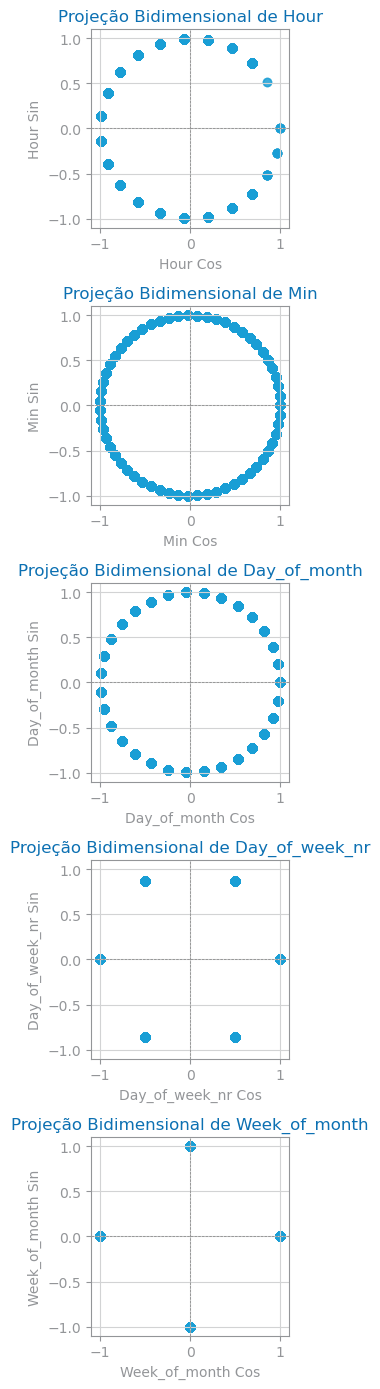

In [11]:
import matplotlib.pyplot as plt

# Lista de variáveis cíclicas
cyclical_vars = ['hour', 'min', 'day_of_month', 'day_of_week_nr','week_of_month']

# Criar gráficos de dispersão para cada variável cíclica com tamanho maior
plt.figure(figsize=(14, 14))  # Aumentando o tamanho da figura

for i, var in enumerate(cyclical_vars):
    # Valores de seno e cosseno para a variável atual
    x_values = data_enc[f'{var}_cos']
    y_values = data_enc[f'{var}_sin']
    
    # Criar um subplot para cada variável
    plt.subplot(len(cyclical_vars), 1, i + 1)
    plt.scatter(x_values, y_values, alpha=0.6)
    plt.axhline(0, color='gray', lw=0.5, ls='--')
    plt.axvline(0, color='gray', lw=0.5, ls='--')
    
    # Ajustar os limites dos eixos para melhor visualização
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    
    # Adicionar título e rótulos
    plt.title(f'Projeção Bidimensional de {var.capitalize()}')
    plt.xlabel(f'{var.capitalize()} Cos')
    plt.ylabel(f'{var.capitalize()} Sin')
    
    # Mostrar a grade
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')  # Para garantir que o gráfico é circular

plt.tight_layout()  # Ajustar o layout
plt.show()  # Mostrar todos os gráficos


In [12]:
data_enc.columns

Index(['channel_msg', 'platform', 'email_provider', 'is_opened', 'is_clicked',
       'is_unsubscribed', 'is_hard_bounced', 'is_soft_bounced',
       'is_complained', 'is_purchased', 'campaign_type', 'channel_cmp',
       'topic', 'total_count', 'subject_length',
       'subject_with_personalization', 'subject_with_deadline',
       'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount',
       'subject_with_saleout', 'day_of_year', 'is_weekend', 'month',
       'time_of_day', 'days_diff_opened_first_time_at_sent_at',
       'days_diff_clicked_first_time_at_sent_at',
       'days_diff_unsubscribed_at_sent_at', 'days_diff_complained_at_sent_at',
       'days_diff_purchased_at_sent_at',
       'days_diff_first_purchase_date_sent_at', 'days_diff_started_at_sent_at',
       'hour_sin', 'hour_cos', 'min_sin', 'min_cos', 'day_of_month_sin',
       'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_sin', 'week_of_month_cos'],
      dtype='obje

In [13]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815316 entries, 0 to 815315
Data columns (total 42 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   channel_msg                              815316 non-null  object 
 1   platform                                 54966 non-null   float64
 2   email_provider                           392558 non-null  object 
 3   is_opened                                815316 non-null  int64  
 4   is_clicked                               815316 non-null  int64  
 5   is_unsubscribed                          815316 non-null  int64  
 6   is_hard_bounced                          815316 non-null  int64  
 7   is_soft_bounced                          815316 non-null  int64  
 8   is_complained                            815316 non-null  int64  
 9   is_purchased                             815316 non-null  int64  
 10  campaign_type                   

# Validate float variables

fazer script em que valido quais são float dentro de cada coluna, e quais nao sao. 
se nao forem float, ver os valores la dentro que nao sao int, e eliminar esses. 

In [14]:
print("DataFrame original:")
print(data_enc)

# Função para validar, listar e remover valores que não são float, preservando os NaNs existentes e exibindo valores únicos
def remove_non_float_records_and_convert(data: pd.DataFrame) -> pd.DataFrame:
    rows_to_remove = set()  # Usar um conjunto para armazenar as linhas a serem removidas
    values_removed = {}  # Dicionário para armazenar os valores removidos por coluna

    for col in data.columns:
        # Detectar valores não numéricos, excluindo os NaNs existentes
        mask_non_float = ~pd.to_numeric(data[col], errors='coerce').notna() & data[col].notna()
        non_float_values = data[col][mask_non_float].unique()  # Pegando apenas os valores únicos

        # Verificar se existem valores não numéricos e exibi-los
        if len(non_float_values) > 0:
            values_removed[col] = non_float_values.tolist()
            print(f"Valores não numéricos distintos removidos na variável '{col}': {values_removed[col]}")

            # Adicionar os índices das linhas que contêm esses valores ao conjunto de remoção
            rows_to_remove.update(data.index[mask_non_float].tolist())

    # Remover as linhas que possuem valores não numéricos
    data = data.drop(index=rows_to_remove).reset_index(drop=True)

    # Converter as colunas restantes para float, ignorando os NaNs
    for col in data.columns:
        # Tentar converter a coluna para float, se falhar, manter como está
        try:
            data[col] = data[col].astype(float)
        except ValueError:
            pass  # Se não conseguir converter, não faz nada

    return data

# Aplicar a função no seu DataFrame chamado data_enc
cleaned_data_enc = remove_non_float_records_and_convert(data_enc)

print("\nDataFrame após limpeza e conversão:")
print(cleaned_data_enc)

DataFrame original:
       channel_msg  platform email_provider  is_opened  is_clicked  \
0                1       NaN              1          1           0   
1                1       NaN              1          0           0   
2                1       NaN              1          0           0   
3                1       NaN              0          0           0   
4                1       NaN              0          1           0   
...            ...       ...            ...        ...         ...   
815311           1       NaN              1          0           0   
815312           1       NaN              7          0           0   
815313           1       NaN              5          0           0   
815314           1       NaN              2          0           0   
815315           1       NaN             12          0           0   

        is_unsubscribed  is_hard_bounced  is_soft_bounced  is_complained  \
0                     0                0                0      

In [15]:
cleaned_data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798944 entries, 0 to 798943
Data columns (total 42 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   channel_msg                              798944 non-null  float64
 1   platform                                 52953 non-null   float64
 2   email_provider                           376193 non-null  float64
 3   is_opened                                798944 non-null  float64
 4   is_clicked                               798944 non-null  float64
 5   is_unsubscribed                          798944 non-null  float64
 6   is_hard_bounced                          798944 non-null  float64
 7   is_soft_bounced                          798944 non-null  float64
 8   is_complained                            798944 non-null  float64
 9   is_purchased                             798944 non-null  float64
 10  campaign_type                   

# Correlation analysis
Before doing this, convert all symbolic variables into numeric ones, and then compute corr matrix.
(See how in Variable Encoding Lab) 

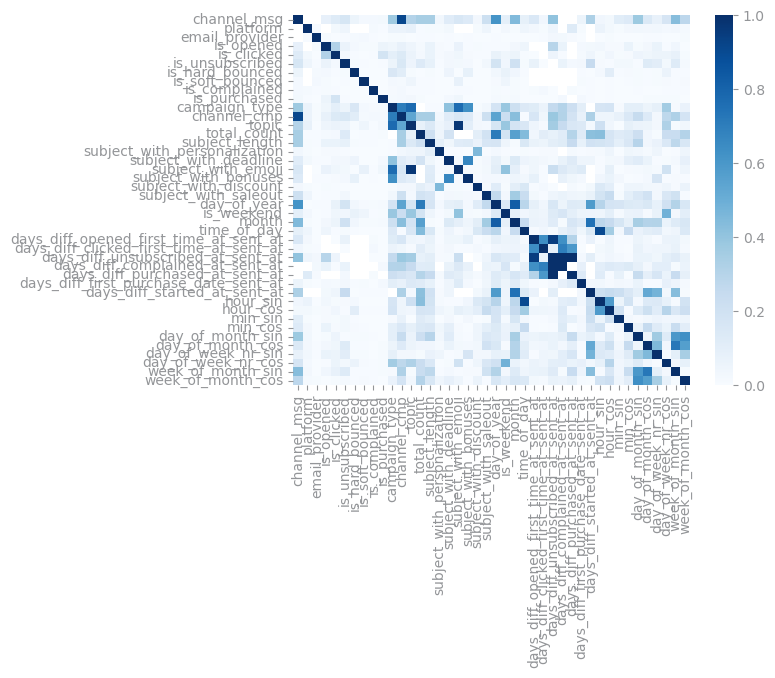

In [16]:
from seaborn import heatmap
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import get_variable_types

variables_types: dict[str, list] = get_variable_types(cleaned_data_enc)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = cleaned_data_enc.corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=cleaned_data_enc.columns,
    yticklabels=cleaned_data_enc.columns,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
savefig(f"./{file_tag}_correlation_analysis.png")
show()

# Save df from preprocessing into a csv file

In [17]:
# Definir o caminho para salvar o arquivo CSV
filepath = r'dataset/df_msg_encoded.csv'

# Salvar o DataFrame em CSV
cleaned_data_enc.to_csv(filepath, index=False)

## Split data between train and test dataset
- split 70/30 and use the most recent records to the test data